In [1]:
import os
import talib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf

In [2]:
# 顯示繁體中文
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

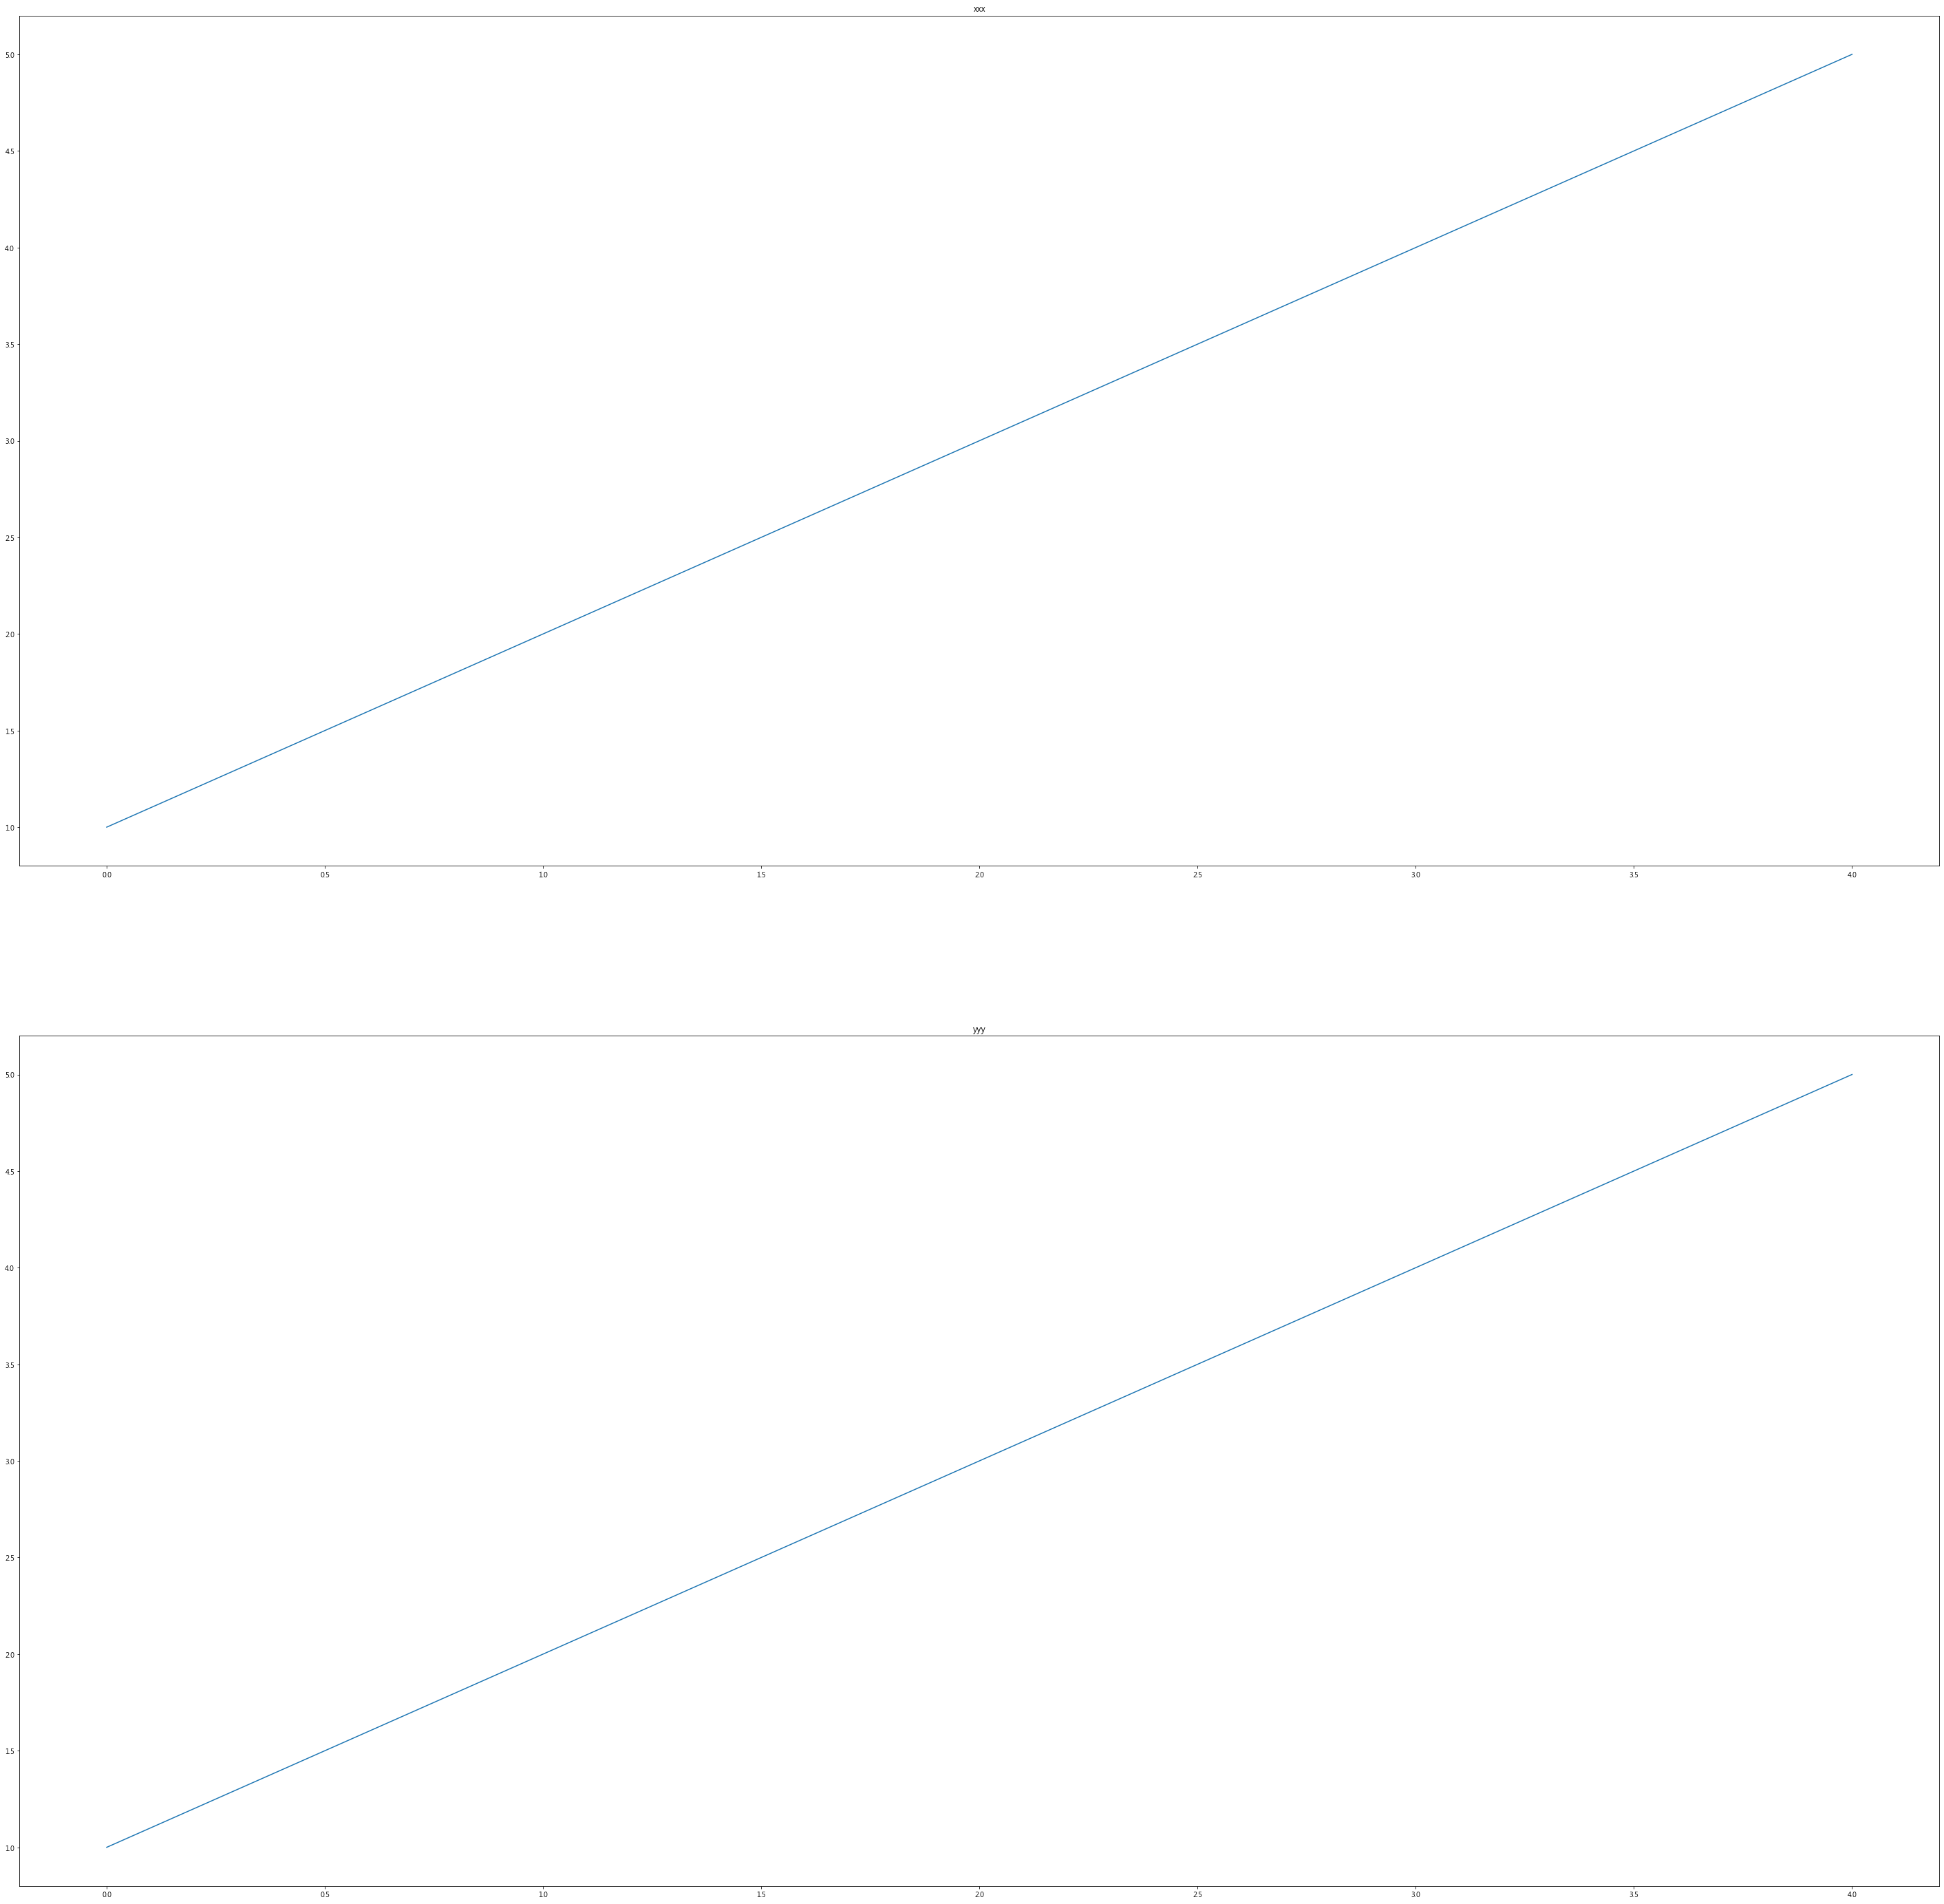

In [9]:
# Testing subplot
x = [1,2,3,4,5]
y = [5,4,3,2,1]
fig, axs = plt.subplots(2,1,figsize=(50,50))

axs[0].set_title('xxx')
axs[0].plot(x)
axs[1].set_title('yyy')
axs[1].plot(x)
# plt.subplot_tool()
plt.show()

## get 900 多檔股票資訊

In [3]:
url = './data/stock_list.csv'

In [4]:
def get_all_stocks_info(source,saving=False):
    stocks = pd.read_csv(source,index_col=0)
    stocks_dict = {}

    for i in range(len(stocks)):
        s = stocks.iloc[i]
        
        if s['代號'] > 9999:
            continue
        symbol = str(s['代號']).zfill(4) if s['代號']< 1000 else str(s['代號']) 
        stocks_dict[s['股票名稱']] = yf.Ticker(symbol+'.TW')
        
    return stocks_dict

In [5]:
data = get_all_stocks_info(url)
data

{'台泥': yfinance.Ticker object <1101.TW>,
 '亞泥': yfinance.Ticker object <1102.TW>,
 '嘉泥': yfinance.Ticker object <1103.TW>,
 '環泥': yfinance.Ticker object <1104.TW>,
 '幸福': yfinance.Ticker object <1108.TW>,
 '信大': yfinance.Ticker object <1109.TW>,
 '東泥': yfinance.Ticker object <1110.TW>,
 '味全': yfinance.Ticker object <1201.TW>,
 '味王': yfinance.Ticker object <1203.TW>,
 '大成': yfinance.Ticker object <1210.TW>,
 '大飲': yfinance.Ticker object <1213.TW>,
 '卜蜂': yfinance.Ticker object <1215.TW>,
 '統一': yfinance.Ticker object <1216.TW>,
 '愛之味': yfinance.Ticker object <1217.TW>,
 '泰山': yfinance.Ticker object <1218.TW>,
 '福壽': yfinance.Ticker object <1219.TW>,
 '台榮': yfinance.Ticker object <1220.TW>,
 '福懋油': yfinance.Ticker object <1225.TW>,
 '佳格': yfinance.Ticker object <1227.TW>,
 '聯華': yfinance.Ticker object <1229.TW>,
 '聯華食': yfinance.Ticker object <1231.TW>,
 '大統益': yfinance.Ticker object <1232.TW>,
 '天仁': yfinance.Ticker object <1233.TW>,
 '黑松': yfinance.Ticker object <1234.TW>,
 '興泰': yfina

In [6]:
len(data)

1077

# 布林通道

In [7]:
tsmc = yf.Ticker('2330.TW')
tsmch = tsmc.history(period='max')
upperband,middleband,lowerband = talib.BBANDS(tsmch['Close'],timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)


In [8]:
tsmch['2023-01-01 00:00:00+08:00':'2023-10-12 00:00:00+08:00']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00+08:00,439.084071,446.467772,436.130591,445.975525,14885824,0.0,0.0
2023-01-04 00:00:00+08:00,442.529785,447.944499,441.545292,442.529785,19188422,0.0,0.0
2023-01-05 00:00:00+08:00,451.882506,452.374752,447.944532,451.390259,23549581,0.0,0.0
2023-01-06 00:00:00+08:00,447.944532,452.374752,447.944532,451.390259,20886011,0.0,0.0
2023-01-09 00:00:00+08:00,460.742907,473.541321,460.250660,473.541321,46666263,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-04 00:00:00+08:00,521.000000,523.000000,519.000000,520.000000,28358964,0.0,0.0
2023-10-05 00:00:00+08:00,523.000000,529.000000,523.000000,528.000000,24945684,0.0,0.0
2023-10-06 00:00:00+08:00,530.000000,533.000000,529.000000,532.000000,15336587,0.0,0.0


<AxesSubplot:xlabel='Date'>

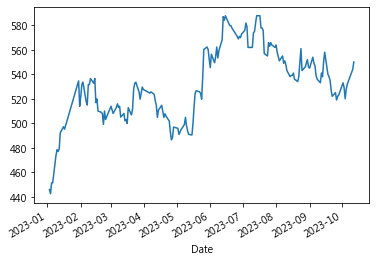

In [9]:
tsmch['2023-01-01':'2023-10-12']['Close'].plot()

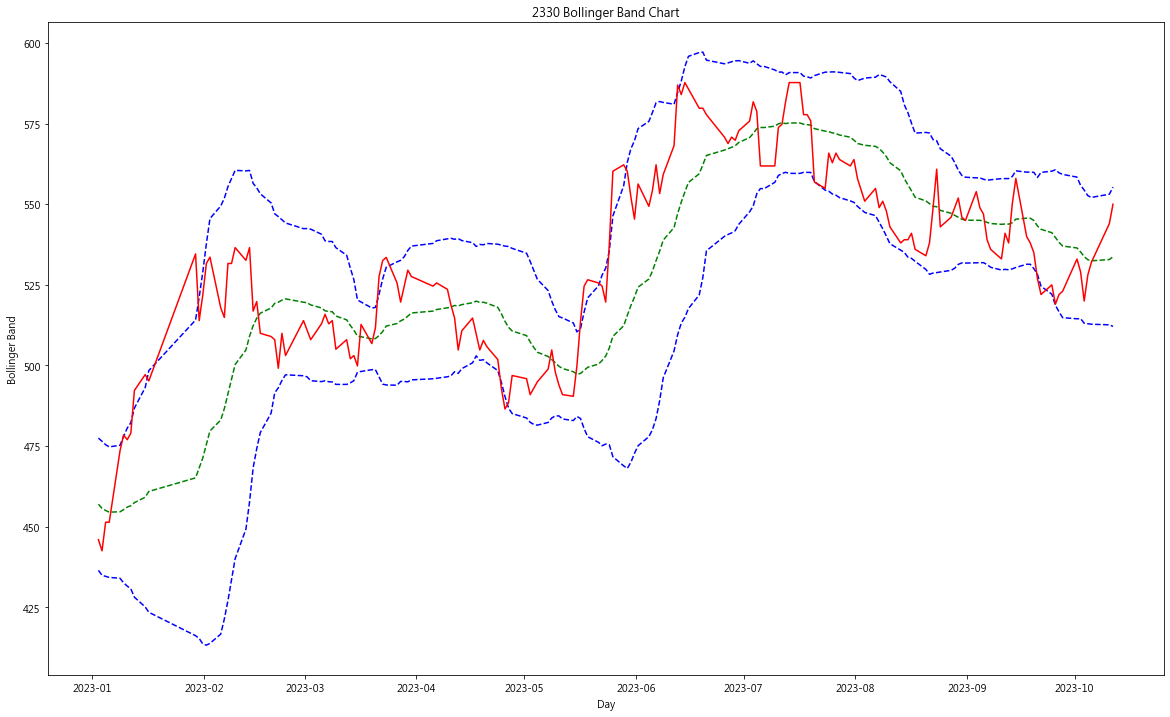

In [10]:
# 視覺化
plt.figure(figsize=(20,12))

plt.plot(upperband['2023-01-01':'2023-10-12'],
         label="upperband",color='b',
         linestyle='--')
plt.plot(middleband['2023-01-01':'2023-10-12'],
         label="middleband",color='g',linestyle='--')
plt.plot(lowerband['2023-01-01':'2023-10-12'],
         label="lowerband",color='b',
         linestyle='--')
plt.plot(tsmch['2023-01-01 00:00:00+08:00':'2023-10-12 00:00:00+08:00']['Close'],
         label='close',color='r',
         linestyle='solid',)
plt.title(f"2330 Bollinger Band Chart") 
plt.xlabel("Day") 
plt.ylabel("Bollinger Band")
plt.show()

In [11]:
# 帶寬
a = (upperband['2023-01-01':'2023-10-12']-lowerband['2023-01-01':'2023-10-12'])/middleband['2023-01-01':'2023-10-12']

<AxesSubplot:xlabel='Date'>

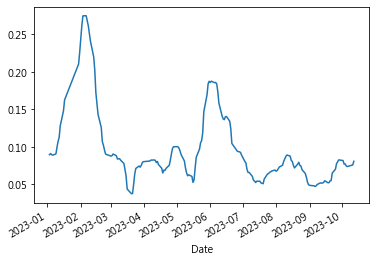

In [12]:
a.plot()

In [13]:
b= a[:-1]<1 
b.value_counts()

True    182
dtype: int64

In [14]:
def make_plot(symbol,close,upper,middle,lower,name):
    plt.figure(figsize=(30,18))

    plt.plot(upper,
             label="upperband",color='b',
             linestyle='--')
    plt.plot(middle,
             label="middleband",color='g',linestyle='--')
    plt.plot(lower,
             label="lowerband",color='b',
             linestyle='--')
    plt.plot(close,
            label='price',color='r',linestyle='solid')
    plt.title(f"{i}({k.info['symbol']}) Bollinger Band Chart") 
    plt.xlabel("Day") 
    plt.ylabel("Bollinger Band")
#     plt.show()
    plt.savefig(f'./data/BBAND/{i}.jpg')

In [15]:
# 多頭訊號
def get_signal(stock) -> None:
    
    ### GO LONG ###
    # (1)股價由下往上穿越下線：股價可能短期會反轉。
    stock['cross_lower'] = np.where(stock['Close']>stock['lowerband'],1,0)
    # (2)股價由下往上穿越中線：股價可能會加速向上，是買進訊號。
    stock['cross_middle'] = np.where(stock['Close']>stock['middleband'],1,0)
    # (3)股價在中線與上線之間：代表目前為多頭行情。
    stock['middle_upper'] = np.where((stock['Close']>stock['middleband'])&(stock['Close']<stock['upperband']),1,0)
    
    ### GO SHORT ###
    # (4)股價由上往下跌破上線：暗示上漲趨勢結束，是賣出的訊號。
    stock['under_upper'] = np.where(stock['Close']<stock['upperband'],1,0)
    # (5)股價由上往下跌破中線：股價可能會下跌，是賣出訊號。
    stock['under_middle'] = np.where(stock['Close']<stock['middleband'],1,0)
    # (6)股價在中線與下線之間：代表目前為空頭行情。
    stock['middle_lower'] = np.where((stock['Close']>stock['lowerband'])&(stock['Close']<stock['middleband']),1,0)

In [16]:
# 經觀察發現，timeperiod=20,nbdevup=2,nbdevdn=2時帶寬約0.2就已經是喇叭口了


for i,k in data.items():
#     print(type(k.history()))
    try:
        history = k.history(period='max')
    #     history.head()
        history.fillna(0)
        stock = history.copy()
    except:
        print(f"{i} cannot read history")
        continue
#     try:
    stock['upperband'],stock['middleband'],stock['lowerband'] = talib.BBANDS(history['Close'],timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)

    start= '2023-01-01'
    end = '2023-10-12'
    upper = stock['upperband'][start:end]
    middle = stock['middleband'][start:end]
    lower = stock['lowerband'][start:end]

#         make_plot(k.info['symbol'],stock[start+' 00:00:00+08:00':end+' 00:00:00+08:00']['Close'],
#                   upper,middle,lower,i)

    period=5
    get_signal(stock)

    try:
        #(1)
        if 0 in stock['cross_lower'][-5:].to_list()[:2] and stock['cross_lower'][-5:].to_list()[2:] == [1,1,1]:
            print(f"{i}({k.info['symbol']}: ${stock['Close'][-1]}) 股價由下往上穿越下線：股價可能短期會反轉。")
        #(2)
        elif 0 in stock['cross_middle'][-5:].to_list()[:2] and stock['cross_middle'][-5:].to_list()[2:] == [1,1,1]:
            print(f"{i}({k.info['symbol']}: ${stock['Close'][-1]}) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號")
        #(3)
        elif 0 not in stock['middle_upper'][-5:].to_list():
            print(f"{i}({k.info['symbol']}: ${stock['Close'][-1]}) 股價在中線與上線之間：代表目前為多頭行情")
    except Exception as e:
        
        print(e)
        print(f"{i} is not able to do BBANDS")
        continue

亞泥(1102.TW: $40.599998474121094) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
東泥(1110.TW: $19.100000381469727) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
味王(1203.TW: $41.900001525878906) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
統一(1216.TW: $69.0) 股價由下往上穿越下線：股價可能短期會反轉。
佳格(1227.TW: $37.45000076293945) 股價由下往上穿越下線：股價可能短期會反轉。
黑松(1234.TW: $38.599998474121094) 股價在中線與上線之間：代表目前為多頭行情
台達化(1309.TW: $17.299999237060547) 股價由下往上穿越下線：股價可能短期會反轉。
昭輝(1339.TW: $62.70000076293945) 股價在中線與上線之間：代表目前為多頭行情
遠東新(1402.TW: $29.299999237060547) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
新纖(1409.TW: $15.5) 股價在中線與上線之間：代表目前為多頭行情
新紡(1419.TW: $42.900001525878906) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
利華(1423.TW: $32.91667175292969) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
大東(1441.TW: $13.449999809265137) 股價在中線與上線之間：代表目前為多頭行情
大將(1453.TW: $13.850000381469727) 股價在中線與上線之間：代表目前為多頭行情
集盛(1455.TW: $9.850000381469727) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
聯發(1459.TW: $9.800000190734863) 股價由下往上穿越中線：股價可能會加速向上，是買進訊號
強盛(1463.TW: $15.449999809265137) 股價由下往上穿越下線：股價可能短期會反轉。
聚隆(1466.TW: $10.850000381469727) 股價由下往上穿越下線：股價可能短期會反轉。
大統新創(1

3536.TW: No data found, symbol may be delisted


Exception: inputs are all NaN